Aim: To predict Audi prices considering several contributors

1.Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

2.Import the data from csv file

In [2]:
data=pd.read_csv('audi.csv')
data.head(5)
#Target Variable:Price

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


3.Data cleaning and data exploration

In [3]:
#data Cleaning
#See if there are any missing values in the data
data.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

In [4]:
#checking for probable noisy data
data.loc[data['year']>2021]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


As there are no results for year >2021, there are no descrpancies in year column

In [5]:
data.shape

(10668, 9)

In [6]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


4.Understanding the variables and their influence on the target variable

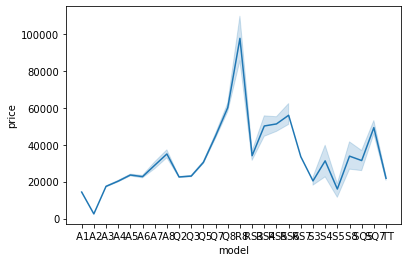

In [7]:
sns.lineplot(data=data,x='model',y='price')


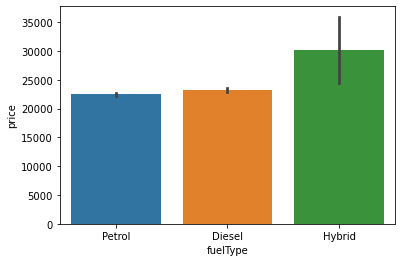

In [8]:
sns.barplot(data=data,x='fuelType',y='price')

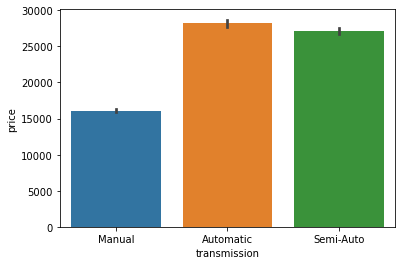

In [9]:
sns.barplot(data=data,x='transmission',y='price')

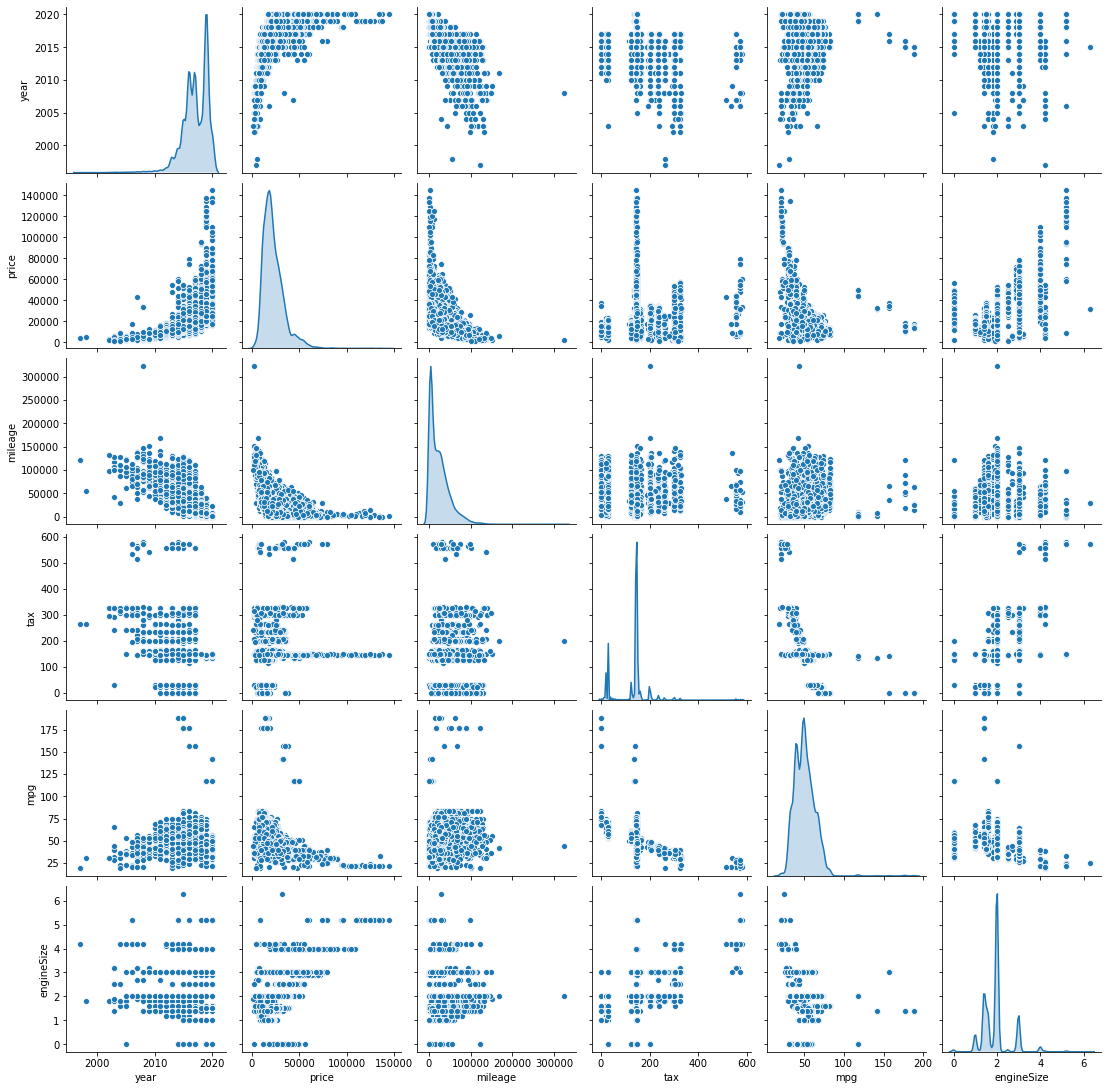

In [10]:
sns.pairplot(data,diag_kind='kde')

The above plot gives idea about distribution of data(skewness)

5.checking outliers

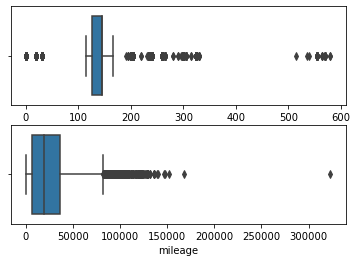

In [11]:
fig,(ax1,ax2) = plt.subplots(2)
sns.boxplot(data['tax'],ax=ax1)
sns.boxplot(data['mileage'],ax=ax2)

6.Label Encoding for nominal categorical variables

In [12]:
#label encoding categorical variables
model_label=LabelEncoder()
model_enc=model_label.fit_transform(data['model'])
data['model_encoded']=model_enc
#data['model_encoded'].head()

trans_label=LabelEncoder()
trans_enc=trans_label.fit_transform(data['transmission'])
data['transmission_encoded']=trans_enc

ft_label=LabelEncoder()
ft_enc=ft_label.fit_transform(data['fuelType'])
data['fuelType_encoded']=ft_enc

In [13]:
x=data.drop(columns=['price','model','transmission','fuelType'])
y=data['price']

7.Dividing data into Training and Testing dataset

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

 Linear Regression without preprocessing

In [15]:
LR=LinearRegression()
LR.fit(x_train,y_train)


LinearRegression()

In [16]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name,LR.coef_[idx]))

The coefficient for year is 2126.883636230846
The coefficient for mileage is -0.09244355435410792
The coefficient for tax is -15.781420332640794
The coefficient for mpg is -158.32531613886664
The coefficient for engineSize is 10799.335639280458
The coefficient for model_encoded is 279.43746280415314
The coefficient for transmission_encoded is -158.01654613803268
The coefficient for fuelType_encoded is 554.731296937123


In [17]:
intercept = LR.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4277724.326513679


In [18]:
print('R2 Score for training dataset',LR.score(x_train,y_train)*100,'%')

R2 Score for training dataset 78.49891189202964 %


In [19]:
print('R2 Score for test dataset:',LR.score(x_test,y_test)*100,'%')
y_pred_1=LR.predict(x_test)

R2 Score for test dataset: 79.0812124234525 %


 Linear regression with preprocessing

In [20]:
poly=PolynomialFeatures(degree=2)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)

LR_poly=LinearRegression()
LR_poly.fit(x_train2,y_train)

LinearRegression()

In [21]:
LR_poly.fit(x_test2,y_test)

LinearRegression()

In [22]:
print('R2 score for train dataset:',LR_poly.score(x_train2,y_train)*100,'%')

R2 score for train dataset: 90.9398395060489 %


In [23]:
print('R2 Score for test dataset is:',LR_poly.score(x_test2,y_test)*100,'%')
y_pred_2=LR_poly.predict(x_test2)


R2 Score for test dataset is: 92.16363911233752 %


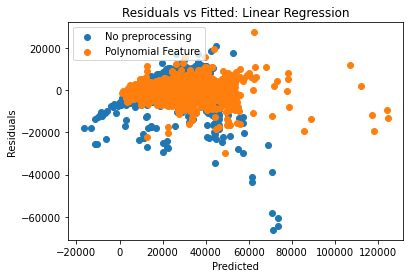

In [24]:
resid_test_1= y_pred_1 - y_test
resid_test_2= y_pred_2 - y_test

plt.scatter(y_pred_1, resid_test_1, label = "No preprocessing")
plt.scatter(y_pred_2, resid_test_2,  label = "Polynomial Feature")

plt.title("Residuals vs Fitted: Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 14, color = "red")
plt.show()

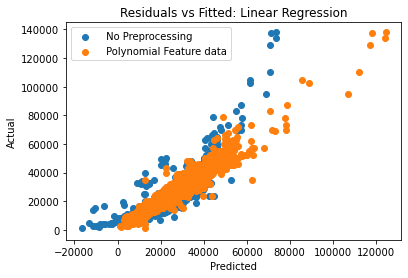

In [25]:
resid_test_1= y_pred_1 - y_test
resid_test_2= y_pred_2 - y_test

plt.scatter(y_pred_1, y_test, label = " No Preprocessing")
plt.scatter(y_pred_2, y_test,  label = " Polynomial Feature data")

plt.title("Residuals vs Fitted: Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 14, color = "red")
plt.show()

Observations and Conclusion:
-Right choice of preprocessing provides enhanced accuracy
